# LSTM Model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the data
df=pd.read_csv('RELIANCE.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df[['Close']].dropna()
df.head()

,Close
Date,
2000-01-03,251.70
2000-01-04,271.85
2000-01-05,282.50
2000-01-06,294.35
2000-01-07,314.55


## Visualising Closing Price

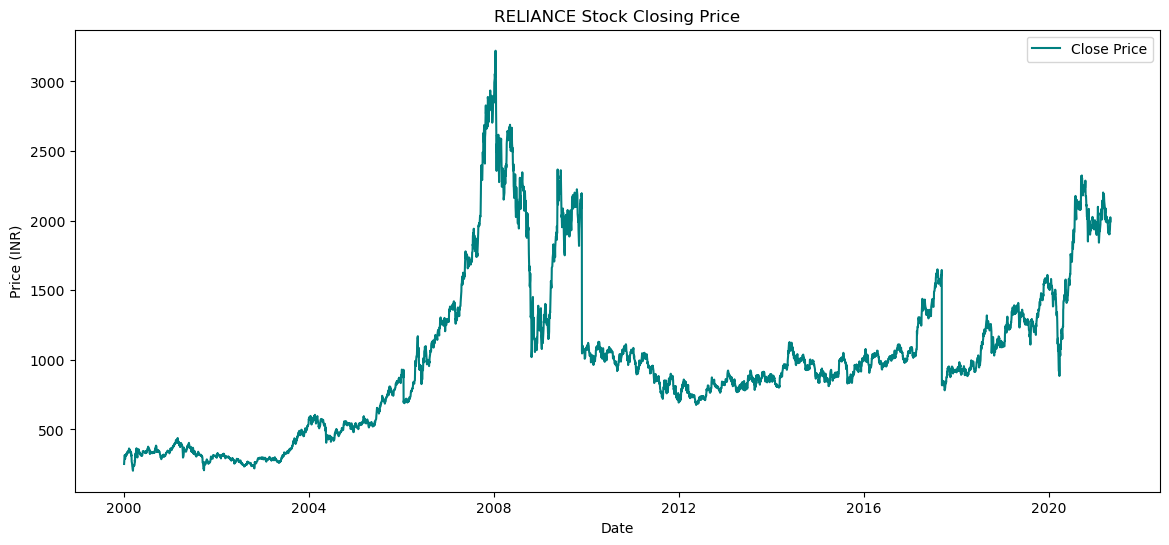

In [4]:
# Plot the closing price
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close Price', color='teal')
plt.title('RELIANCE Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

In [5]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

# Create sequences
X, y = [], []
sequence_length = 60
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))

## Fitting the model

In [7]:
# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5


C:\Users\hiadi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0155
Epoch 2/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 7.3718e-04
Epoch 3/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 5.7083e-04
Epoch 4/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 3.3731e-04
Epoch 5/5
132/132 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 5.1927e-04


## Visualisation

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


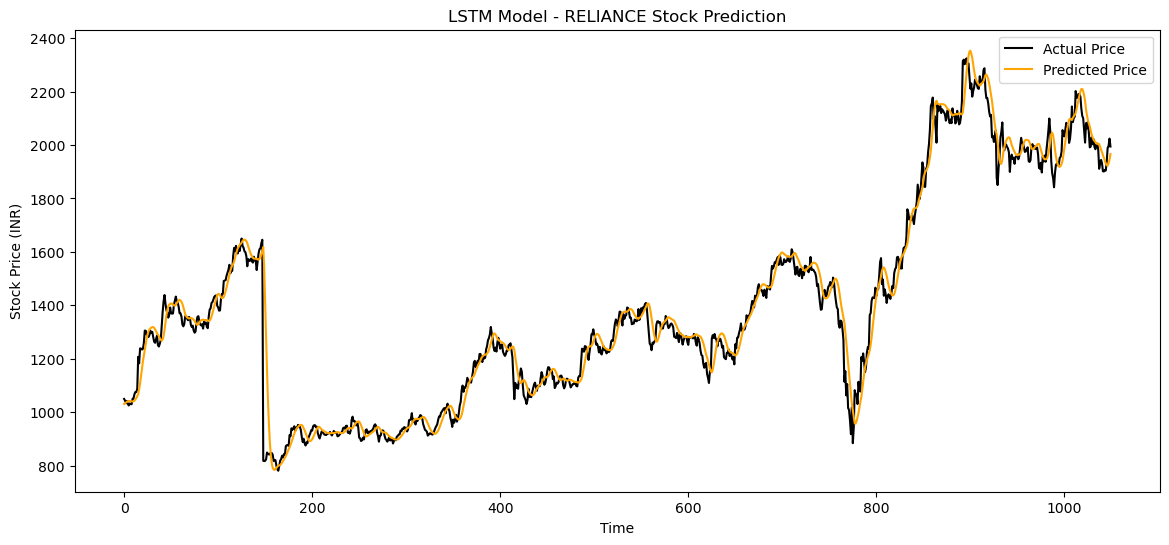

In [9]:
# Predict and inverse transform
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted.reshape(-1, 1))
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(14,6))
plt.plot(real_prices, color='black', label='Actual Price')
plt.plot(predicted_prices, color='orange', label='Predicted Price')
plt.title('LSTM Model - RELIANCE Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price (INR)')
plt.legend()
plt.show()

## Metrics

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score
import numpy as np

# Flatten arrays just in case
real = real_prices.flatten()
pred = predicted_prices.flatten()

# Directional accuracy
real_direction = np.sign(np.diff(real))
pred_direction = np.sign(np.diff(pred))
directional_accuracy = np.mean(real_direction == pred_direction)

# F1 Score: Use 'macro' or 'micro' if you have more than two classes
f1 = f1_score(real_direction, pred_direction, average='macro', zero_division=1)

# MAE and RMSE
mae = mean_absolute_error(real, pred)
rmse = np.sqrt(mean_squared_error(real, pred))

# Print metrics
print(f"LSTM Model Accuracy Metrics:")
print(f"  Directional Accuracy     : {directional_accuracy:.4f}")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")
print(f"  Root MSE (RMSE)          : {rmse:.4f}")
print(f"  F1 Score                 : {f1:.4f}")


LSTM Model Accuracy Metrics:
  Directional Accuracy     : 0.5033
  Mean Absolute Error (MAE): 38.7616
  Root MSE (RMSE)          : 65.3030
  F1 Score                 : 0.3336
